In [1]:
from sentinel_download.alaska_satellite_facility import ASF
from datetime import datetime, timedelta
import os

In [2]:
# Provide your credentials (nasa earthdata) here in a json file for submitting and downloading jobs via ASF
asf_credentials = "/p/project/hai_wemonitor/S2LS/src/preprocessing/credentials/asf_credentials.json"
asf = ASF(asf_credentials)
asf.available_collections()

Successfully activated HyP3 session. You are now able to submit jobs and download them via ASF.
All available satellite platforms. Please use the exact names when searching for products.
['AIRSAR', 'ALOS', 'ERS', 'ERS1', 'ERS2', 'JERS', 'RADARSAT', 'SEASAT', 'SENTINEL1', 'SENTINEL1A', 'SENTINEL1B', 'SIRC', 'SMAP', 'UAVSAR']


In [3]:
# Specifiy some search parameters
satellite = 'SENTINEL1A'
processing_level = 'SLC'
start_date = datetime(year=2019, month=2, day=28) - timedelta(days=5)
end_date = datetime(year=2019, month=3, day=20) + timedelta(days=7)
shapefile_path = "/p/project/hai_wemonitor/S2LS/data/locations/Chimanimani/annotations/Chimanimani.shp"

search_parameters = {
    'satellite': satellite,
    'processingLevel': processing_level,
    #'flightDirection': "descending",
    'start' : start_date,
    'end' : end_date,
    'shapefile': shapefile_path
}

In [4]:
# Use the ASF-API to search the catalog with your parameters
asf_results = asf.search(search_parameters)
if asf_results:
    for result in asf_results:
        print("Processing date: ", result.properties["processingDate"])
        print("File ID: ", result.properties["fileID"] )
        print("Frame number: ", result.properties["frameNumber"])

6 results found.
Processing date:  2019-03-25T16:15:47.000Z
File ID:  S1A_IW_SLC__1SDV_20190325T161547_20190325T161615_026496_02F7C9_20BE-SLC
Frame number:  1114
Processing date:  2019-03-19T03:17:04.000Z
File ID:  S1A_IW_SLC__1SDV_20190319T031704_20190319T031731_026401_02F44F_67F0-SLC
Frame number:  657
Processing date:  2019-03-18T16:23:51.000Z
File ID:  S1A_IW_SLC__1SDV_20190318T162351_20190318T162421_026394_02F415_B57D-SLC
Frame number:  1112
Processing date:  2019-03-13T16:15:22.000Z
File ID:  S1A_IW_SLC__1SDV_20190313T161522_20190313T161557_026321_02F156_A63C-SLC
Frame number:  1109
Processing date:  2019-03-07T03:17:04.000Z
File ID:  S1A_IW_SLC__1SDV_20190307T031704_20190307T031731_026226_02EDD4_49EB-SLC
Frame number:  657
Processing date:  2019-02-23T03:17:04.000Z
File ID:  S1A_IW_SLC__1SDV_20190223T031704_20190223T031731_026051_02E795_2C79-SLC
Frame number:  657


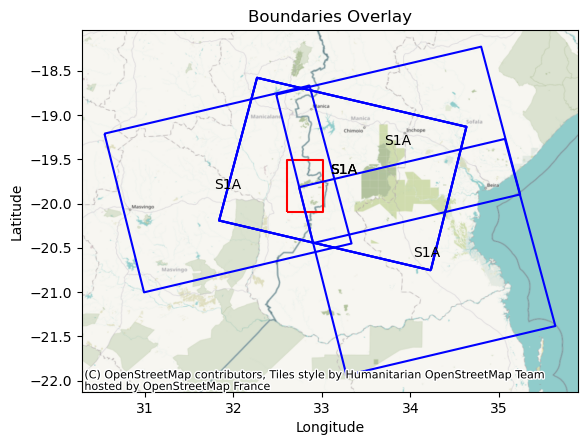

In [5]:
# Get an overview about the extent od the available tiles for your area of interest
asf.plot_results(shapefile=shapefile_path)

In [6]:
# Generate Sentinel-1 RTC products from the SLC data - this might take a while ~1-2h per job (tile) 
# Modify the search result, e.g. remove items by using the class variable asf.search_results = asf.search_results[:2]
job_name = "insar_jobs" # "rtc_jobs"
# rtc_jobs = asf.start_rtc_jobs(job_name=job_name) 
# insar_jobs = asf.start_rtc_jobs(job_name=job_name) 

In [7]:
# Use asf.get_jobs() to get all current jobs and there status
rtc_jobs = asf.get_jobs(job_name, status="all")
print("Current status of jobs:")
print(rtc_jobs)

Current status of jobs:
12 HyP3 Jobs: 12 succeeded, 0 failed, 0 running, 0 pending.


In [33]:
# Filter jobs by status: SUCCEEDED, FAILED, RUNNING, PENDING
successfull_rtc_jobs = asf.get_jobs(job_name, status="SUCCEEDED")
for job in successfull_rtc_jobs:
    print(job)

HyP3 RTC_GAMMA job ed0af933-8299-47e2-aefa-055027cad468
HyP3 RTC_GAMMA job cc2f44c4-3dd1-46ef-a288-b899c5e246f9
HyP3 RTC_GAMMA job 86910426-ee05-45fb-8401-04e66ec9bb41
HyP3 RTC_GAMMA job 577b3878-3a1f-4e74-975c-59fc075d8e72
HyP3 RTC_GAMMA job 6b1cf3fb-f62b-4ccd-ab31-8957dc0d6aef
HyP3 RTC_GAMMA job 6969476d-9dfd-4e31-b9cf-3224d189aae4
HyP3 RTC_GAMMA job eb6e04ee-3b7b-4058-9f45-72dc4aed26ff
HyP3 RTC_GAMMA job b8bd23ed-dfbd-491a-b05f-f176616ca508
HyP3 RTC_GAMMA job e7f1bbce-ea8a-4d5b-8eab-0c0b77083e6b
HyP3 RTC_GAMMA job 39322cbb-f9d4-4c50-bb57-c7bfa4514eb0
HyP3 RTC_GAMMA job d3efa775-f0ee-4d46-9756-d33133e2f8e9
HyP3 RTC_GAMMA job 3aa93bfe-f4ec-480c-a66c-ed0c22106526


In [34]:
# Remove the last 6 jobs, because i already downloaded them
for i in range(6):
    del successfull_rtc_jobs[-1] 
for job in successfull_rtc_jobs:
    print(job)

HyP3 RTC_GAMMA job ed0af933-8299-47e2-aefa-055027cad468
HyP3 RTC_GAMMA job cc2f44c4-3dd1-46ef-a288-b899c5e246f9
HyP3 RTC_GAMMA job 86910426-ee05-45fb-8401-04e66ec9bb41
HyP3 RTC_GAMMA job 577b3878-3a1f-4e74-975c-59fc075d8e72
HyP3 RTC_GAMMA job 6b1cf3fb-f62b-4ccd-ab31-8957dc0d6aef
HyP3 RTC_GAMMA job 6969476d-9dfd-4e31-b9cf-3224d189aae4


In [35]:
# Download the succeeded jobs
output_folder = "/p/project/hai_wemonitor/S2LS/data/test_rtc_data/Chimanimani" # os.getcwd()
downloaded_file_paths = successfull_rtc_jobs.download_files(location=output_folder)

S1A_IW_20190223T031704_DVP_RTC10_G_gpuned_86F8.zip: 100%|██████████| 3.82G/3.82G [03:14<00:00, 21.1MB/s]
S1A_IW_20190307T031704_DVP_RTC10_G_gpuned_225F.zip: 100%|██████████| 3.82G/3.82G [04:32<00:00, 15.1MB/s]
S1A_IW_20190313T161522_DVP_RTC10_G_gpuned_8FB8.zip: 100%|██████████| 5.07G/5.07G [04:07<00:00, 22.0MB/s]
S1A_IW_20190318T162351_DVP_RTC10_G_gpuned_E55A.zip: 100%|██████████| 4.21G/4.21G [03:55<00:00, 19.2MB/s]
S1A_IW_20190319T031704_DVP_RTC10_G_gpuned_328B.zip: 100%|██████████| 3.81G/3.81G [02:25<00:00, 28.0MB/s]
S1A_IW_20190325T161547_DVP_RTC10_G_gpuned_1AEF.zip: 100%|██████████| 3.92G/3.92G [02:55<00:00, 24.0MB/s]
100%|██████████| 6/6 [21:15<00:00, 212.61s/it]
